<h1>Librerías</h1>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import numpy as np

<h1>Carga de data</h1>

In [35]:
df = pd.read_csv('train.csv')

<h1>Exploración de la data <h1>

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df.shape

(891, 12)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<h1>Análisis exploratorio</h1>

<h2>Eliminación de columnas</h2>
<ul>
<li>Se decidió eliminar las columnas identificadoras ya que no aportarán información al modelo, que son Name, Ticket y PassengerID</li>
<li>También se decidió eliminar la columna Cabin ya que contiene más del 50% de valores nulos</li>
</ul>

In [40]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace =True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<h2>Gráfico de la variable objetivo</h2>

<ipython-input-41-7e8eb196a566>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='Survived',palette='dark')


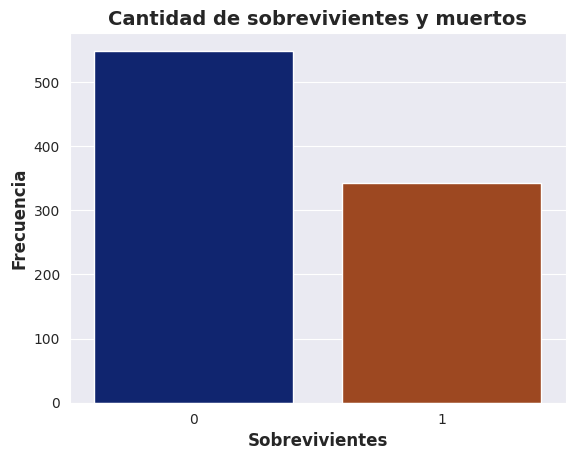

In [41]:
sns.countplot(df,x='Survived',palette='dark')
plt.title('Cantidad de sobrevivientes y muertos',fontsize = 14,fontweight='bold')
plt.xlabel('Sobrevivientes',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frecuencia',fontsize = 12,fontweight = 'bold')
plt.show()

<h2>Análisis univariado</h2>

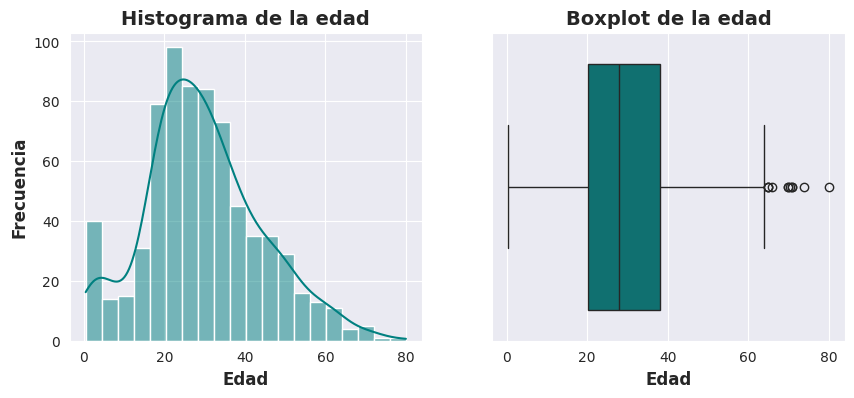

In [42]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

sns.histplot(df,x='Age',kde = True,color='teal',ax=ax[0])
ax[0].set_title('Histograma de la edad',fontsize=14,fontweight='bold')
ax[0].set_xlabel('Edad',fontsize=12,fontweight='bold')
ax[0].set_ylabel('Frecuencia',fontsize=12,fontweight='bold')
sns.boxplot(df,x='Age',ax=ax[1],color = 'teal')
ax[1].set_title('Boxplot de la edad',fontsize = 14,fontweight='bold')
ax[1].set_xlabel('Edad',fontsize=12,fontweight='bold')
plt.show()

<h2>Análisis Bivariado respecto de la variable objetivo<h2>


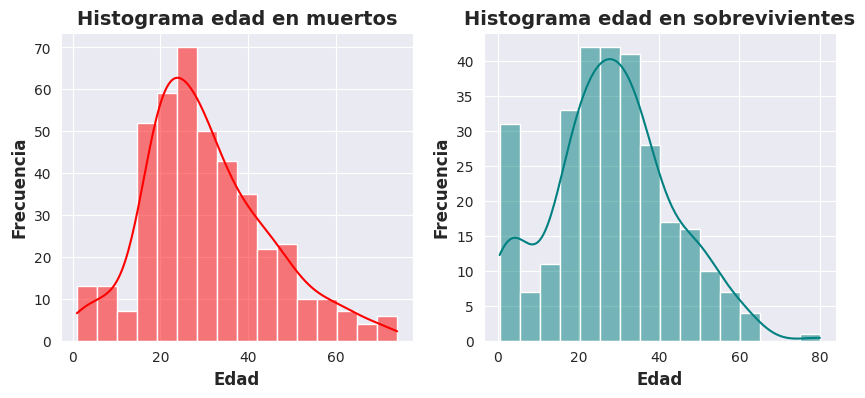

In [43]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
sns.histplot(df[df['Survived']==0],x='Age',kde = True,color='red',ax=ax[0])
ax[0].set_title('Histograma edad en muertos',fontsize=14,fontweight='bold')
ax[0].set_xlabel('Edad',fontsize=12,fontweight='bold')
ax[0].set_ylabel('Frecuencia',fontsize=12,fontweight='bold')
sns.histplot(df[df['Survived']==1],x='Age',kde = True,color='teal',ax=ax[1])
ax[1].set_title('Histograma edad en sobrevivientes',fontsize=14,fontweight='bold')
ax[1].set_xlabel('Edad',fontsize=12,fontweight='bold')
ax[1].set_ylabel('Frecuencia',fontsize=12,fontweight='bold')
plt.show()

<h2>Sexo de los pasajeros</h2>

Text(0, 0.5, 'Frecuencia')

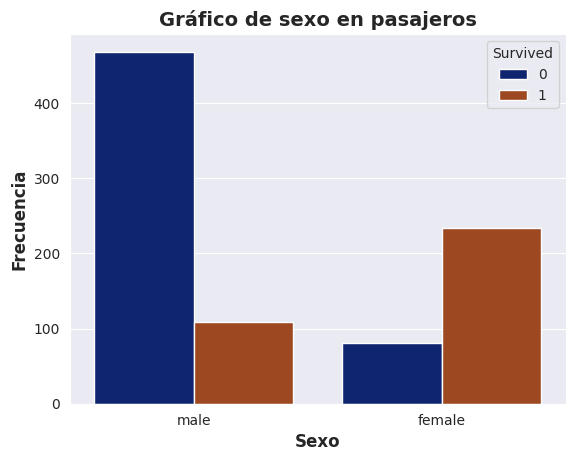

In [44]:
sns.countplot(df,x='Sex',hue='Survived',palette='dark')
plt.title('Gráfico de sexo en pasajeros',fontsize=14,fontweight='bold')
plt.xlabel('Sexo',fontsize=12,fontweight='bold')
plt.ylabel('Frecuencia',fontsize=12,fontweight='bold')

<h2>Clase de los pasajeros</h2>

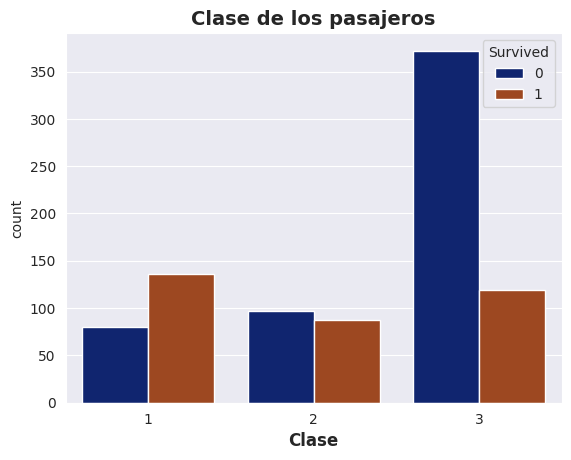

In [45]:
sns.countplot(df,x='Pclass',hue='Survived',palette='dark')
plt.title('Clase de los pasajeros',fontsize=14,fontweight='bold')
plt.xlabel('Clase',fontsize=12,fontweight='bold')
plt.show()

<h2>Gráfico puerto de embarque de los pasajeros</h2>

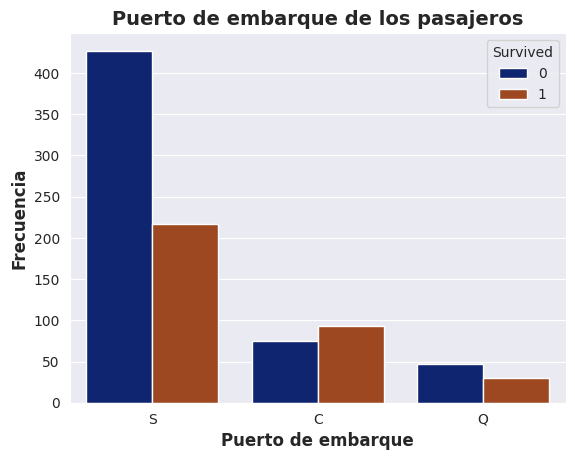

In [46]:
sns.countplot(df,x='Embarked',hue='Survived',palette='dark')
plt.title('Puerto de embarque de los pasajeros',fontsize=14,fontweight='bold')
plt.xlabel('Puerto de embarque',fontsize=12,fontweight='bold')
plt.ylabel('Frecuencia',fontsize=12,fontweight='bold')
plt.show()

<h2>Gráfico para el precio del ticket</h2>

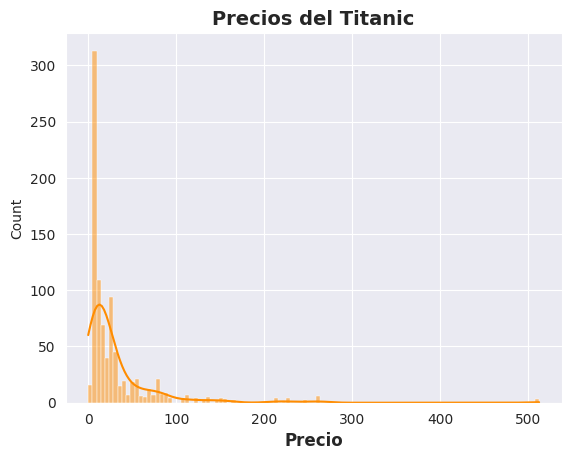

In [47]:
sns.histplot(df,x='Fare',kde=True,color='darkorange')
plt.xlabel('Precio',fontsize=12,fontweight='bold')
plt.title('Precios del Titanic',fontsize=14,fontweight='bold')
plt.show()

In [48]:
df['Fare'].value_counts()

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
13.8583,1
50.4958,1
5.0000,1


In [49]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<h2>Construcción de una nueva variable<h2>
Parch y SibSp

In [50]:
df['Familia'] = ((df['SibSp']>0)|(df['Parch']>0)).astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familia
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [51]:
df.drop(columns = ['SibSp','Parch'],inplace=True)

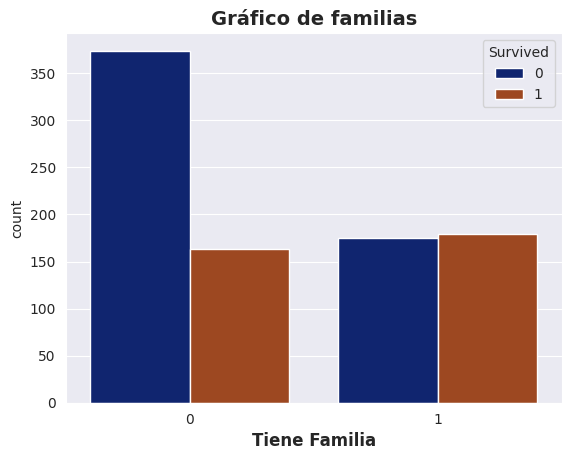

In [52]:
sns.countplot(df,x='Familia',hue='Survived',palette='dark')
plt.title('Gráfico de familias',fontsize=14,fontweight='bold')
plt.xlabel('Tiene Familia',fontsize=12,fontweight='bold')
plt.show()

<h1>Procesamiento de la data</h1>

<h2>Transformación de columnas categóricas en dummies</h2>

In [53]:
df.dropna(subset='Embarked',inplace=True)
df['Pclass'].astype('object')
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0
Embarked,0
Familia,0


In [54]:
df2 = pd.get_dummies(df,columns=['Pclass','Sex','Embarked'],drop_first=True)
df2

,Survived,Age,Fare,Familia,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,False,True,True,False,True
1,1,38.0,71.2833,1,False,False,False,False,False
2,1,26.0,7.9250,0,False,True,False,False,True
3,1,35.0,53.1000,1,False,False,False,False,True
4,0,35.0,8.0500,0,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,0,True,False,True,False,True
887,1,19.0,30.0000,0,False,False,False,False,True
888,0,NaN,23.4500,1,False,True,False,False,True
889,1,26.0,30.0000,0,False,False,True,False,False


<h2>Imputación de valores nulos para Edad</h2>

In [55]:
df2['Age_is_Nan'] = df2['Age'].isna().astype('int')
mediana_edad = df2['Age'].median(skipna=True)
df2['Age'] = df2['Age'].fillna(mediana_edad)

In [56]:
df2.head()

,Survived,Age,Fare,Familia,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age_is_Nan
0,0,22.0,7.2500,1,False,True,True,False,True,0
1,1,38.0,71.2833,1,False,False,False,False,False,0
2,1,26.0,7.9250,0,False,True,False,False,True,0
3,1,35.0,53.1000,1,False,False,False,False,True,0
4,0,35.0,8.0500,0,False,True,True,False,True,0


In [57]:
df2[['Pclass_2','Pclass_3','Sex_male','Embarked_Q','Embarked_S']] = df2[['Pclass_2','Pclass_3','Sex_male','Embarked_Q','Embarked_S']].astype('int')

<h1>Separar en conjunto de entrenamiento y Test</h1>

In [58]:
X = df2.drop(columns = 'Survived')
y = df2['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<h2>Estandarización de las variables numéricas</h2>

In [59]:
scaler = StandardScaler()
scaler.fit(X_train[['Age','Fare']])
X_train[['Age','Fare']] = scaler.transform(X_train[['Age','Fare']])
X_test[['Age','Fare']] = scaler.transform(X_test[['Age','Fare']])


In [60]:
X_train.head()

,Age,Fare,Familia,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age_is_Nan
708,-0.571868,2.430597,0,0,0,0,0,1,0
240,-0.115088,-0.358135,1,0,1,0,0,0,1
382,0.189432,-0.490949,0,0,1,1,0,1,0
792,-0.115088,0.762595,1,0,1,0,0,1,1
683,-1.180908,0.301860,1,0,1,1,0,1,0


<h1>Generación de un modelo lineal</h1>

<h2>Regresión logística</h2>

In [61]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
prediccion = logistic.predict(X_test)
matriz_confusion = classification_report(y_test,prediccion)
print(matriz_confusion)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       109
           1       0.70      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



<h2>Regresión logística utilizando validación cruzada</h2>

In [62]:
cross_val_accuracy = cross_val_score(logistic,X_train,y_train,cv=10,scoring='accuracy')
cross_val_recall = cross_val_score(logistic,X_train,y_train,cv=10,scoring='recall')
print(f'Resultado Acurracy con validación cruzada: {cross_val_accuracy.mean()}')
print(f'Resultado recall con validación cruzada: {cross_val_recall.mean()}')

Resultado Acurracy con validación cruzada: 0.800293427230047
Resultado recall con validación cruzada: 0.678968253968254


<>

<h2>Xgboost Model</h2>

In [63]:
param_grid = {'learning_rate':np.arange(0.05,1.05,0.05),
              'n_estimators':np.arange(100,1000,100),
              'subsample':np.arange(0.05,1.05,0.05),
              'alpha':np.arange(0,1.1,0.1),
              'gamma':np.arange(0,1.1,0.1),
              'max_depth':np.arange(1,7,1)}

gbm = xgb.XGBClassifier(random_state=42)
xgb_rs_cv = RandomizedSearchCV(estimator=gbm,param_distributions=param_grid,n_iter=100,cv=4,n_jobs=-1,refit=True,scoring='accuracy',verbose=1)
xgb_rs_cv.fit(X_train,y_train)
print("Mejores parámetros encontrados: ",xgb_rs_cv.best_params_)
print("Mejor presición para el modelo: ",xgb_rs_cv.best_score_)

predicciones_xgb = xgb_rs_cv.predict(X_test)
matriz_confusion = confusion_matrix(y_test,predicciones_xgb)
print(matriz_confusion)


Fitting 4 folds for each of 100 candidates, totalling 400 fits
Mejores parámetros encontrados:  {'subsample': np.float64(1.0), 'n_estimators': np.int64(200), 'max_depth': np.int64(6), 'learning_rate': np.float64(0.2), 'gamma': np.float64(0.5), 'alpha': np.float64(0.0)}
Mejor presición para el modelo:  0.838276836158192
[[96 13]
 [17 52]]
